In [1]:
%matplotlib inline

import ipykernel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
                                                                                                                                                                                                                                


from scipy.ndimage import gaussian_filter
from scipy.stats import scoreatpercentile, norm

# Unsharp Masking

Short script to visualize better the young sequence in the CMD.
The photometric conditions are applied to select the data, as always.

Then we make an histogram of the data in $G-J$ vs $G$, and we convolve it with two Gaussian filters, with different amplitude to a) highlight the sequence we are interested in and b) remove the background.


In [2]:
rc('text', usetex= True)
rc('font', family='serif', weight = 'normal', size=20)

In [20]:
hdu = fits.open('/data1/Data/Gaia/XMatch_2MASS_crosslt1arsec.fits')
data = hdu[1].data

Photometric Selection

In [21]:
data = data[data['ph_qual'] == 'AAA']
ic = ((data['j_m'] - data['h_m']) < -1.05*(data['h_m'] - data['ks_m']) + 0.97) & \
                   (data['j_m'] < 15.) & (data['j_m'] - data['h_m'] < 0.74) & \
                   (data['h_m'] - data['ks_m'] > -0.2)  & \
                   (data['h_m'] - data['ks_m'] < 0.43 )     
data = data[ic]

In [24]:
print('Number of sources after photometric selection:' ,(len(data)))

Number of sources after photometric selection: 1450911


Selection of sources for the CMD

In [25]:
coord = [(data['l']>=195.) & (data['l'] <= 212) & (data['b'] >= -22.) & (data['b'] <= -12.)]

In [26]:
data_cmd = data[coord]

In [28]:
print('Number of sources used in the CMD:', len(data_cmd))

Number of sources used in the CMD: 278447


Create the histogram

In [30]:
gminj = data_cmd['phot_g_mean_mag'] - data_cmd['j_m']
g = data_cmd['phot_g_mean_mag']
binsx = np.linspace(-0.5, 4., 450)
binsy = np.linspace(6, 19, 1300)
counts, xedges, yedges = np.histogram2d(gminj, g, bins = [binsx, binsy])

And perform the unsharping

In [ ]:
unsharped_mask = gaussian_filter(counts, sigma = [2,6], mode = 'constant') - \
                gaussian_filter(counts, sigma = [10, 30], mode = 'constant')

Here I uppload the sources within the TGAS S = 3 levels to plot them in the CMD

In [381]:
tgashdu = fits.open('/data1/Data/TGAS/kdeSelection.fits')
tgas = tgashdu[1].data

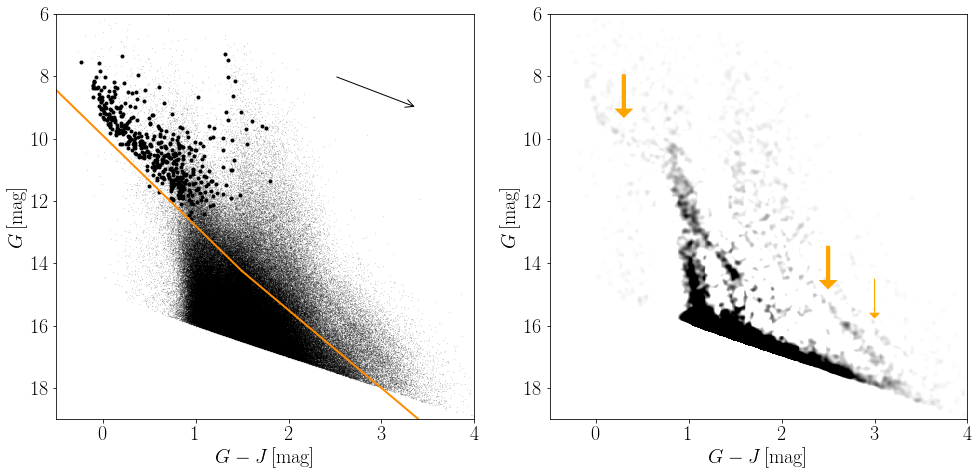

In [384]:
### Plot
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.plot(data_cmd['phot_g_mean_mag'] - data_cmd['j_m'], 
         data_cmd['phot_g_mean_mag'], '.k', ms =0.1)
plt.plot(tgas['phot_g_mean_mag'] - tgas['j_m'], 
         tgas['phot_g_mean_mag'], 'ok', ms =3)



x = np.linspace(1.5,4.,  100)
y = 2.5*x + 10.5
x2 = np.linspace(-0.5,1.5,  100)
y2 = 2.9*x2 + 9.9
plt.plot(x, y, '-', color = 'DarkOrange',
         lw = 2, antialiased = True)
plt.plot(x2, y2, '-', color = 'DarkOrange', lw = 2, antialiased = True)
plt.annotate("", xy=(2.5, 8.), xytext=(3.38, 9.0), xycoords = 'data',
        arrowprops=dict(arrowstyle="<-",))


plt.xlabel(r'$G-J \, \mathrm{[mag]}$', fontsize = 20)
plt.ylabel(r'$G \, \mathrm{[mag]}$', fontsize = 20)
plt.axis([-0.5, 4, 19., 6.])

plt.subplot(122)
im =plt.imshow(unsharped_mask.T, origin = 'lower',
           extent = [-0.5, 4., 6., 19], aspect = 'auto', cmap = cmap, vmin = 0., vmax = 0.5)

plt.arrow(3., 14.5, -0., 1.1, head_width = 0.1, lw = 1, color = 'Orange')
plt.arrow(2.5, 13.5, -0., 1.1, head_width = 0.1, lw = 4, color = 'Orange')
plt.arrow(0.3, 8, -0., 1.1, head_width = 0.1, lw = 4, color = 'Orange')


plt.xlabel(r'$G-J \, \mathrm{[mag]}$', fontsize = 20)
plt.ylabel(r'$G \, \mathrm{[mag]}$', fontsize = 20)
plt.axis([-0.5, 4, 19., 6.])

plt.tight_layout()